Importing Libraries


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

Importing Dataset

In [60]:
dataset=pd.read_csv('wine_data.csv')

Q1.What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [46]:
print("Most Frequent Quality",dataset['quality'].mode()[0])
print("Lowest Quality :",dataset['quality'].min())
print("Highest Quality :",dataset['quality'].max())

Most Frequent Quality 5
Lowest Quality : 3
Highest Quality : 8


Q2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

In [61]:
# fixed acidity vs quality
corr_matrix=dataset[['fixed acidity','quality']].corr()
print("Correlation between fixed acidity and quality is :",corr_matrix.loc['fixed acidity','quality'])

# alcohol vs quality
corr_matrix=dataset[['alcohol','quality']].corr()
print("Correlation between alcohol and quality is :",corr_matrix.loc['alcohol','quality'])

# free sulfur dioxide vs quality
corr_matrix=dataset[['free sulfur dioxide','quality']].corr()
print("Correlation between free sulfur dioxide and quality is :",corr_matrix.loc['free sulfur dioxide','quality'])


Correlation between fixed acidity and quality is : 0.12405164911322257
Correlation between alcohol and quality is : 0.4761663239995377
Correlation between free sulfur dioxide and quality is : -0.05065605724427594


Q3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [62]:
print(dataset.groupby('quality')['residual sugar'].mean())
print("Avg residual sugar for best quality wine is :", dataset.groupby('quality')['residual sugar'].mean().loc[dataset['quality'].max()])
print("Avg residual sugar for lowest quality wine is :", dataset.groupby('quality')['residual sugar'].mean().loc[dataset['quality'].min()])

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64
Avg residual sugar for best quality wine is : 2.5777777777777775
Avg residual sugar for lowest quality wine is : 2.6350000000000002


Q4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64


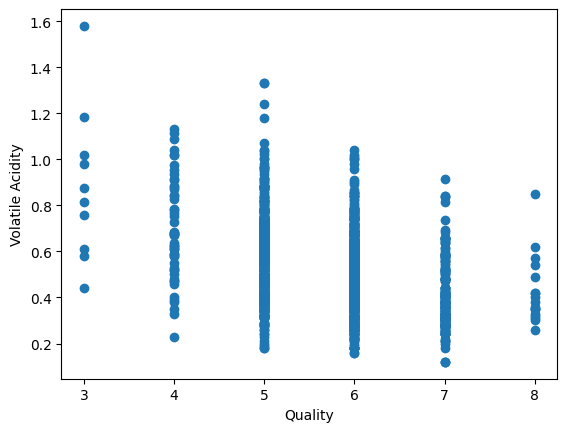

In [64]:
print(dataset.groupby('quality')['volatile acidity'].mean())

# Visualization by plotting graph
plt.scatter(dataset['quality'],dataset['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

Q5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

In [65]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset.drop('quality',axis=1),dataset['quality'],test_size=0.2,random_state=42)

# Feature Scaling for unbiased predictions
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Training the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier( criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

# Making the Confusion Matrix and checking accuracy of our model
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy Score for Decision Tree model:",accuracy_score(y_test,y_pred))

# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print("Accuracy Score for Random Forest model:",accuracy_score(y_test,y_pred))



Accuracy Score for Decision Tree model: 0.55625
Accuracy Score for Random Forest model: 0.671875
